# 6.2 - Exploring Relationships

This notebook is the basis for the exploratory analysis for the Airbnb listings dataset and includes:
1. Importing visualization libraries
2. Subsetting data and creating correlation matrix heatmaps based on quantitative variables
3. Creating scatterplots
4. Running IQR analysis and removing outliers for necessary variables
5. Creating pair plots
6. Creating categorical plots
7. Exporting subset data of vacation listings under 1,000 dollars a night as "vacation_listings_subset"
8. Exporting data for correlation matrix heatmap for use in Tableau

## Task Step 1 - Import Visualization Libraries & Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Define path
path = 'C:/Users/kaymi/OneDrive/Desktop/Career Foundry/Data Immersion/Achievement 6 - Advanced Data Analytics'

In [4]:
# Import data
df_listings = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.csv'))

In [5]:
# Check head
df_listings.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4
1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19
2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5
3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0
4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7


## Task Step 2 - Pick Variables

In [6]:
# Create subset including: price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings, availability_365, and number_of_reviews_ltm
df_sub = df_listings[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']]

In [7]:
df_sub

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,150,3,260,1.61,2,150,4
1,227,1,454,2.88,1,247,19
2,150,30,98,0.67,1,121,5
3,150,3,34,0.22,1,0,0
4,134,30,266,1.64,4,187,7
...,...,...,...,...,...,...,...
6350,500,5,0,NaN,16,364,0
6351,44,30,0,NaN,1,179,0
6352,82,30,0,NaN,112,363,0
6353,45,1,0,NaN,2,106,0


## Task Step 3 - Create Correlation Matrix Heatmap

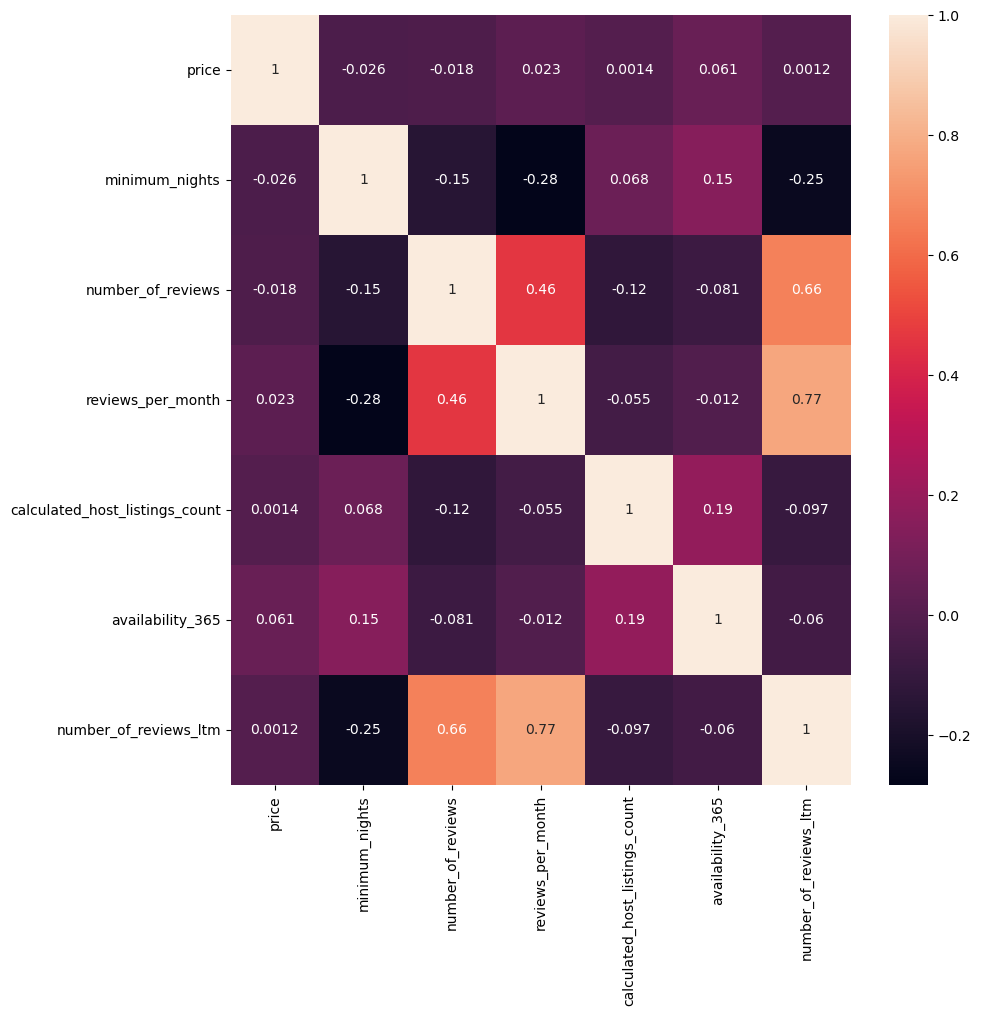

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

There are not any particularly strong correlations between these variables - the strongest is between the reviews per month, number of reviews, and number of reviews in the last twelve months which makes sense as they are variations of the same data, reported in different ways. The next strongest correlation is the slightly negative correlation between minimum_nights and reviews_per_month.

## Task Step 4 - Scatterplots

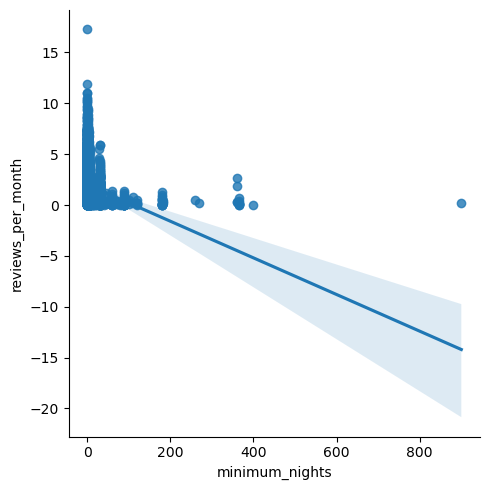

In [9]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns
sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = df_listings)

The correlation looks skewed due to outliers - there is apparently a unit with a minimum night requirement of 999 nights.

### Investigate Outliers in Variables

#### Minimum Nights IQR Analysis

In [10]:
df_listings['minimum_nights'].describe()

count    6355.000000
mean       16.147600
std        31.905929
min         1.000000
25%         2.000000
50%         3.000000
75%        30.000000
max       900.000000
Name: minimum_nights, dtype: float64

<Axes: >

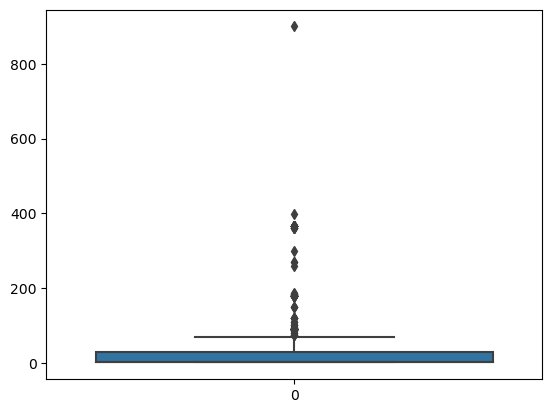

In [11]:
sns.boxplot(df_listings['minimum_nights'])

In [12]:
#IQR - Calculating upper and lower limits
Q1_nights = df_listings['minimum_nights'].quantile(0.25)
Q3_nights = df_listings['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
lower_nights = Q1_nights - 1.5*IQR_nights
upper_nights = Q3_nights + 1.5*IQR_nights

In [13]:
print(IQR_nights)
print(lower_nights)
print(upper_nights)

28.0
-40.0
72.0


I have decided to group listings based on whether they can be considered a "vacation rental" (ie less than 30 night minimum) vs a "long term rental" (ie greater than 30 night minimum). 

In [14]:
#Apply category flag
df_listings.loc[df_listings['minimum_nights'] <= 30, 'rental_type'] = 'Vacation Rental'

In [15]:
df_listings.loc[df_listings['minimum_nights'] > 30, 'rental_type'] = 'Long Term Rental'

In [16]:
df_listings['rental_type'].value_counts(dropna = False)

Vacation Rental     6009
Long Term Rental     346
Name: rental_type, dtype: int64

In [17]:
df_listings.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type
0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4,Vacation Rental
1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19,Vacation Rental
2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5,Vacation Rental
3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0,Vacation Rental
4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7,Vacation Rental


#### Price IQR Analysis

<Axes: >

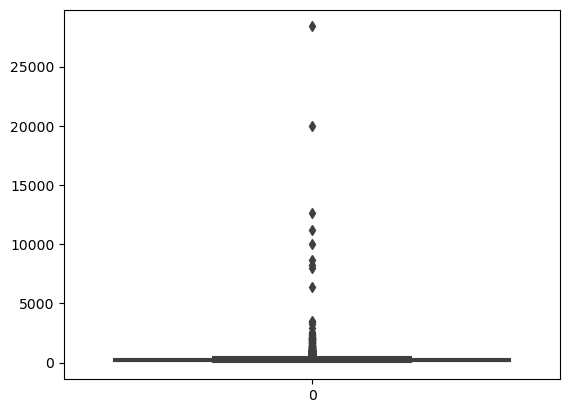

In [18]:
sns.boxplot(df_listings['price'])

In [19]:
#IQR - Calculating upper and lower limits
Q1_price = df_listings['price'].quantile(0.25)
Q3_price = df_listings['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5*IQR_price
upper_price = Q3_price + 1.5*IQR_price

In [20]:
print(IQR_price)
print(lower_price)
print(upper_price)

155.0
-112.5
507.5


<Axes: xlabel='price', ylabel='Count'>

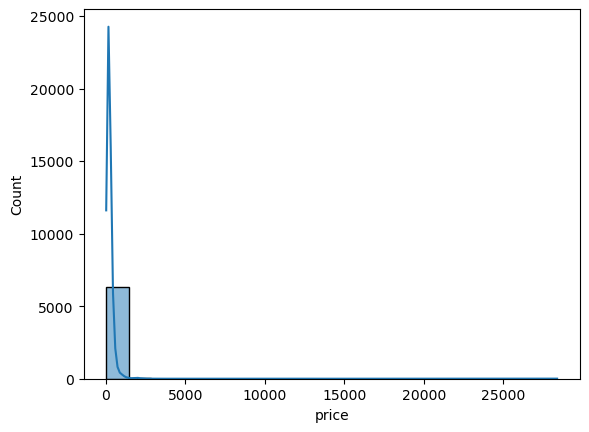

In [21]:
#Checking Distribution of Prices
sns.histplot(df_listings['price'],bins = 20, kde = True)

I found the wide variety in data made it difficult to really see any relationships between variables. There were too many "outliers" in the data skewing the data. While I don't think these outliers are errors (Vancouver is known for high value property), I have chose to create a new subset of data that I want to focus on for this analysis that centers on more "realistic" vacation-specific airbnb listings.

In [22]:
# Create labels for pricing
df_listings.loc[df_listings['price'] < 150, 'price_category'] = 'low price'

In [23]:
df_listings.loc[(df_listings['price'] >= 150) & (df_listings['price'] < 450), 'price_category'] = 'mid-price'

In [24]:
df_listings.loc[(df_listings['price'] >= 450) & (df_listings['price'] < 1000), 'price_category'] = 'high price'

In [25]:
df_listings.loc[df_listings['price'] >= 1000, 'price_category'] = 'expensive'

In [26]:
df_listings['price_category'].value_counts(dropna = False)

mid-price     3429
low price     2384
high price     456
expensive       86
Name: price_category, dtype: int64

### Create new subset for analysis

In [27]:
df_listings.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category
0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price
1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price
2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price
3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price
4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price


In [28]:
df_listings.shape

(6355, 19)

In [29]:
# Create subset for prices under $1,000 per night
df_subset = df_listings.loc[df_listings['price'] < 1000]

In [30]:
# Check counts
df_subset['price_category'].value_counts(dropna = False)

mid-price     3429
low price     2384
high price     456
Name: price_category, dtype: int64

In [31]:
df_subset['price'].describe()

count    6269.000000
mean      216.799809
std       143.474618
min        14.000000
25%       120.000000
50%       177.000000
75%       270.000000
max       999.000000
Name: price, dtype: float64

In [32]:
# Create subset without any "long Term Rentals"
df_analysis = df_subset.loc[df_listings['rental_type'] != 'Long Term Rental']

In [33]:
df_analysis['rental_type'].value_counts(dropna = False)

Vacation Rental    5929
Name: rental_type, dtype: int64

In [34]:
df_analysis.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category
0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price
1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price
2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price
3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price
4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price


In [35]:
df_analysis.shape

(5929, 19)

In [36]:
df_plot = df_analysis[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

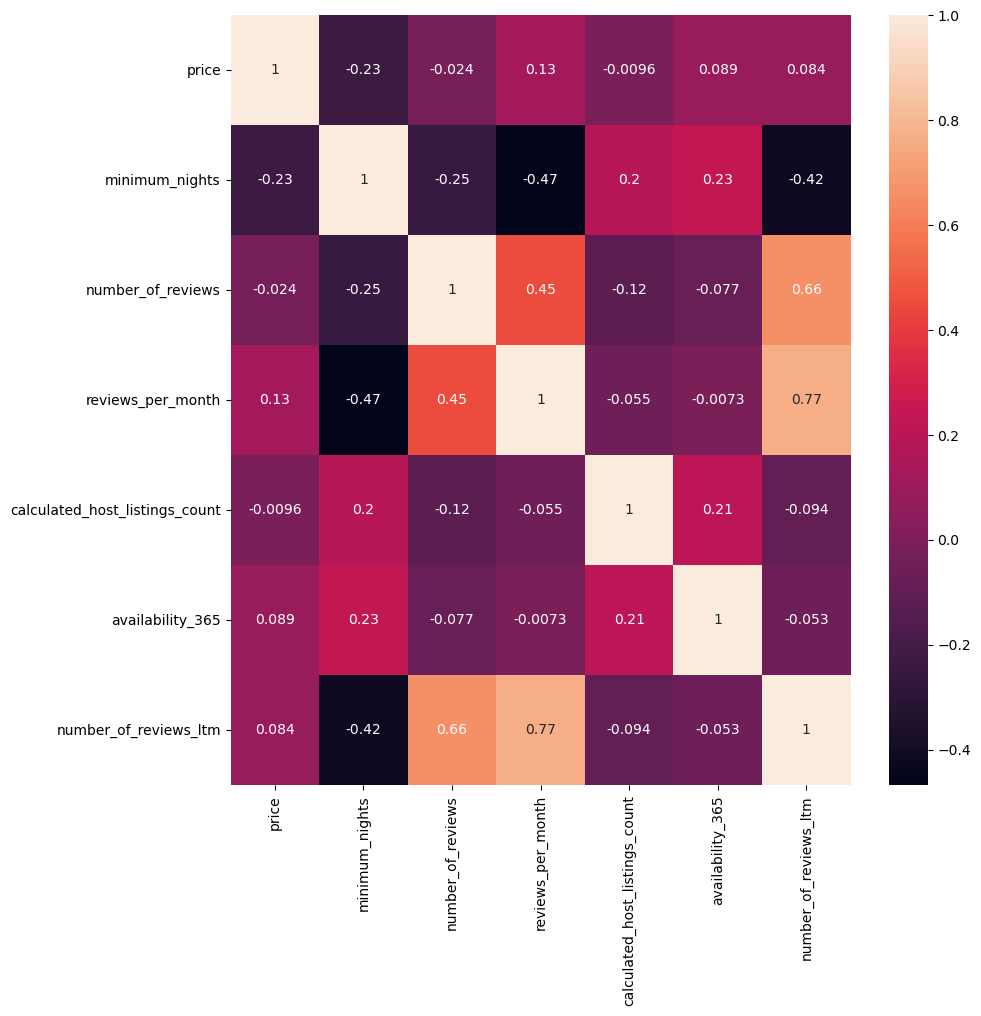

In [37]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_2 = sns.heatmap(df_plot.corr(), annot = True, ax = ax)

I chose to re-run the heatmap to see the effect of removing outliers on the correlations - the correlation between minimum_nights and reviews_per_month increased to a negative correlation of 0.47.

In [38]:
#Export viz
corr_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

In [39]:
# Export df_plot
df_plot.to_csv(os.path.join(path, '02 Data','Prepared Data', 'correlation_matrix.csv'))

## Task Step 4 Continued - Scatterplots

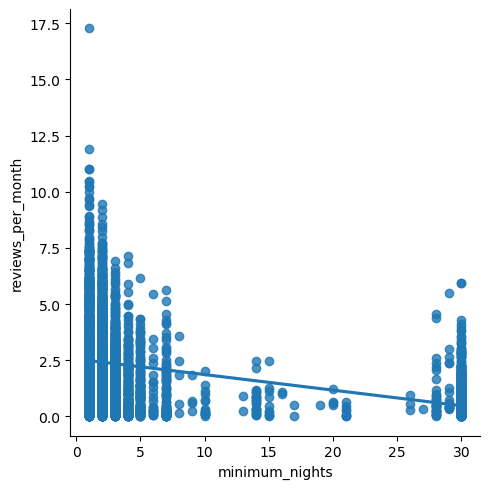

In [40]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns 
scatter_1 = sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = df_plot)

The correlation between reviews per month and minimum nights has increased from a weak negative relationship to a moderate negative relationship. This means that as the minimum nights required increases, the reviews per month decreases. This relationship is likely more due to the number of renters a listing can host per month, not a "causation" factor (ie - it is unlikely the reviews per month is an indicator of a unit's popularity.)

In [41]:
#Export viz
scatter_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'min_nights_reviews.png'))

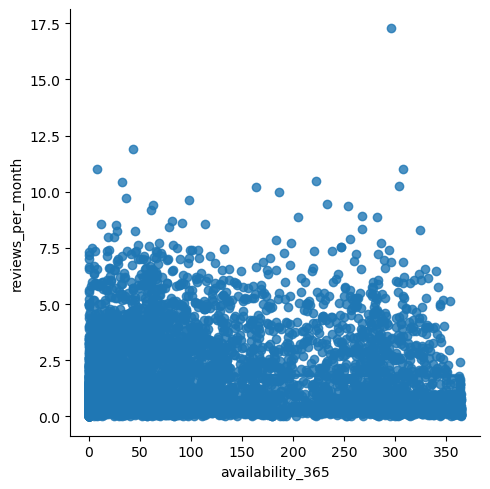

In [42]:
# Create scatterplot for the "availability_365" and "reviews_per_month" columns 
sns.lmplot(x = 'availability_365', y = 'reviews_per_month', data = df_plot)

## Task Step 5 - Pair Plots

In [43]:
# Check columns
df_analysis.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'rental_type',
       'price_category'],
      dtype='object')

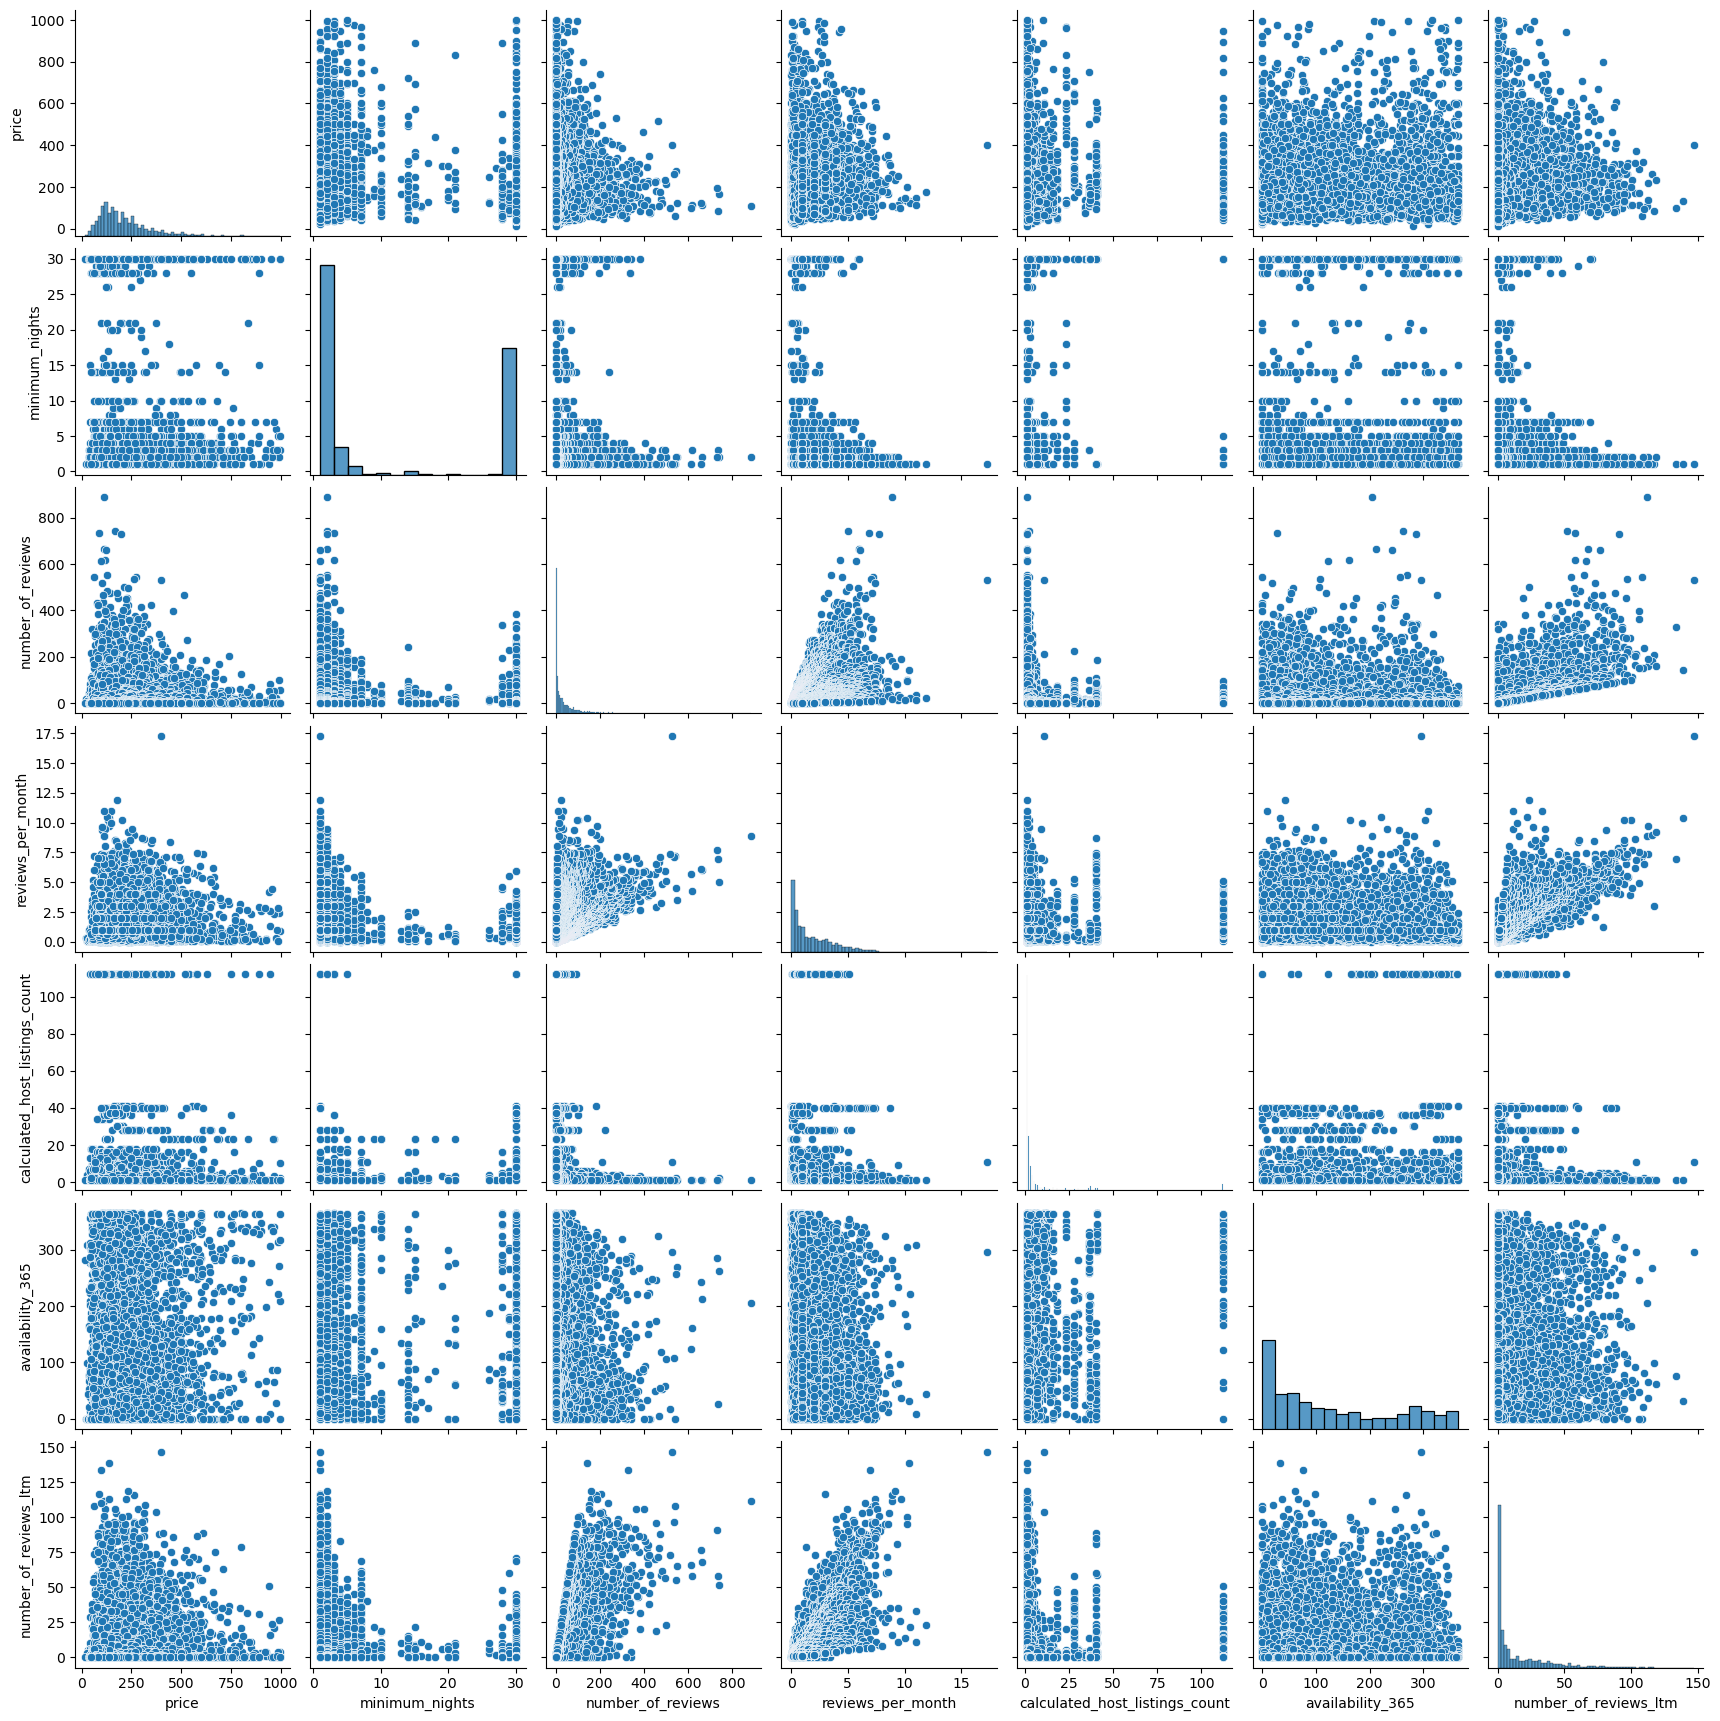

In [44]:
# Create pair plot
pairplot = sns.pairplot(df_plot)

Based on this pair plot, relationships between these variables are still not immediately very strong. There are a few variables I would like to explore further in a categorical plot, namely the availability and minimum nights, and calculated host listings vs availability relationships. From this pair plot we can identify that there are still some potential outliers in this data in the calculated host listings count, however that was identified in the initial analysis as there is one unit owner that has 112 listings. I am still interested in drilling down into the availability variable further, however the other quantitative variables in this data set do not seem to have any strong relationships, so I'm interested to explore the room type and neighbourhood variables as well.

In [45]:
#Export viz
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

## Task Step 6 - Categorical Plot

### Minimum Nights vs. Reviews per Month

<Axes: xlabel='minimum_nights', ylabel='Count'>

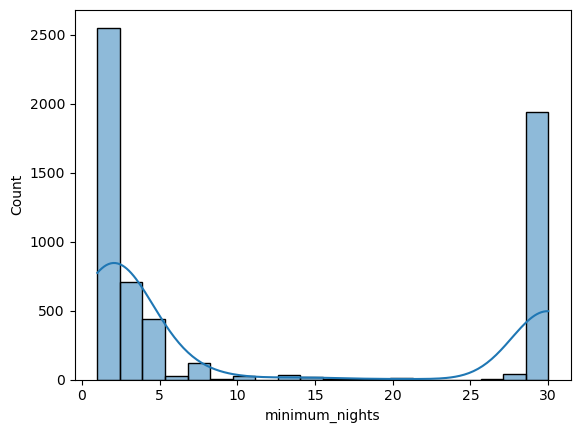

In [46]:
sns.histplot(df_analysis['minimum_nights'],bins = 20, kde = True)

In [47]:
#Apply flags
df_analysis.loc[df_analysis['minimum_nights'] < 7, 'booking_requirement'] = 'less than 1 week'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_10576\2220168247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.loc[df_analysis['minimum_nights'] < 7, 'booking_requirement'] = 'less than 1 week'


In [48]:
df_analysis.loc[(df_analysis['minimum_nights'] >= 7) & (df_analysis['minimum_nights'] < 21 ), 'booking_requirement'] = '1-3 weeks'

In [49]:
df_analysis.loc[df_analysis['minimum_nights'] >= 21, 'booking_requirement'] = 'over 3 weeks'

In [50]:
df_analysis['booking_requirement'].value_counts(dropna = False)

less than 1 week    3724
over 3 weeks        1991
1-3 weeks            214
Name: booking_requirement, dtype: int64

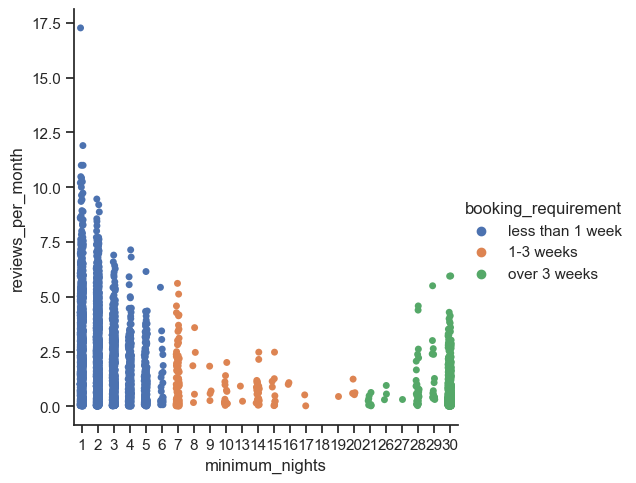

In [51]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'minimum_nights', y = 'reviews_per_month', hue = 'booking_requirement', data = df_analysis)

While I originally thought we may be able to use the "reviews" variables as an indicator of the popularity of a listing since the availability is not overly reliable, I don't think there is a strong indication here. In this particular case, I think the correlation between the minimum nights required to book and the reviews per month is more of an indication that these units likely get booked for shorter periods of time, and therefore likely see more reviews (more people staying in a unit per month means more reviews, versus only one renter per month only equating to one review for that month). 

In [52]:
#Export viz
cat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_reviews.png'))

### Availability Categorical Plots

<Axes: xlabel='availability_365', ylabel='Count'>

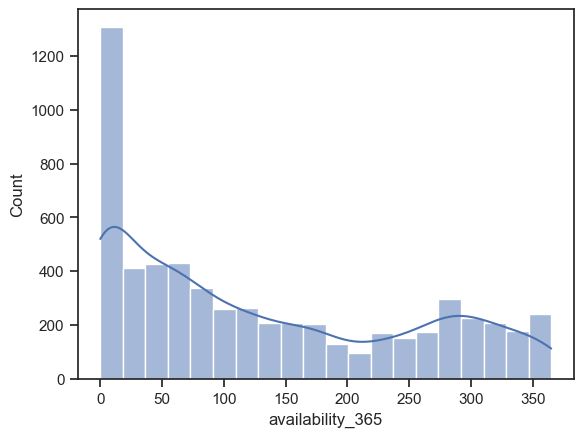

In [53]:
sns.histplot(df_analysis['availability_365'],bins = 20, kde = True)

In [54]:
#Apply flags
df_analysis.loc[df_analysis['availability_365'] < 50, 'popularity'] = 'popular'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_10576\2781718371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.loc[df_analysis['availability_365'] < 50, 'popularity'] = 'popular'


In [55]:
df_analysis.loc[(df_analysis['availability_365'] >=50) & (df_analysis['availability_365'] < 183 ), 'popularity'] = 'booked half year'

In [56]:
df_analysis.loc[(df_analysis['availability_365'] >=183) & (df_analysis['availability_365'] < 360 ), 'popularity'] = 'available half year'

In [57]:
df_analysis.loc[df_analysis['availability_365'] >= 360, 'popularity'] = 'unbooked'

In [58]:
df_analysis['popularity'].value_counts(dropna = False)

booked half year       2043
popular                2012
available half year    1728
unbooked                146
Name: popularity, dtype: int64

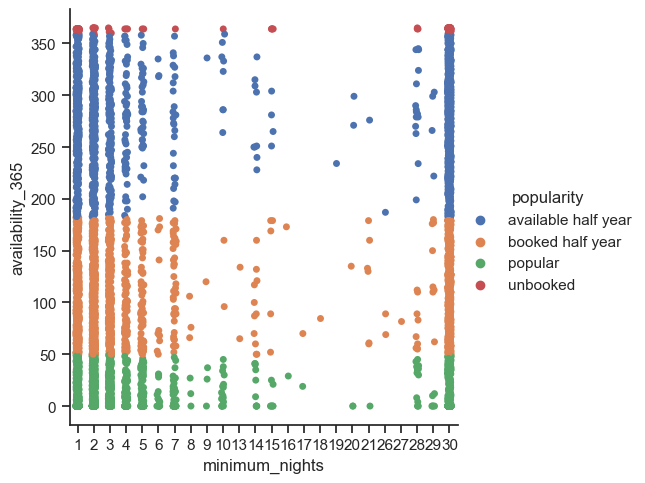

In [59]:
# Create Categorical Plot for Availability vs. Minimum Nights
sns.set(style = "ticks")
cat_2 = sns.catplot(x = 'minimum_nights', y = 'availability_365', hue = 'popularity', data = df_analysis)

In [60]:
#Export viz
cat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_availability.png'))

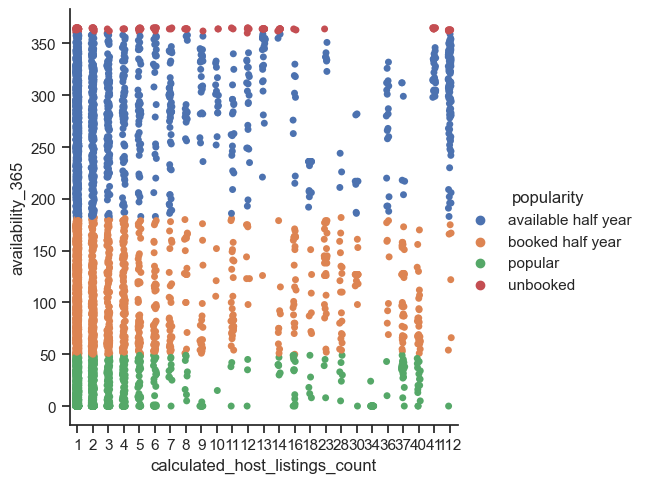

In [61]:
# Create Categorical Plot for Availability vs Calculated Host Listings
sns.set(style = "ticks")
cat_3 = sns.catplot(y = 'availability_365', x = 'calculated_host_listings_count', hue = 'popularity', data = df_analysis)

It is interesting to see from this graph that the unit owner that has 112 listings does not have very many "popular" units; the majority of their units are available for more than half the year. We can see from this cat plot that in general, having more listings available does not increase a host's popularity. There is of course the possibility that some of these hosts (particularly those with only one or two listings) live in the units part time which could be affecting the popularity, but I think it's likely safe to say those a higher number of listings do not live in all their units!

In [62]:
#Export viz
cat_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_availability_host_listings.png'))

### Price vs Minimum Nights Categorical Plot

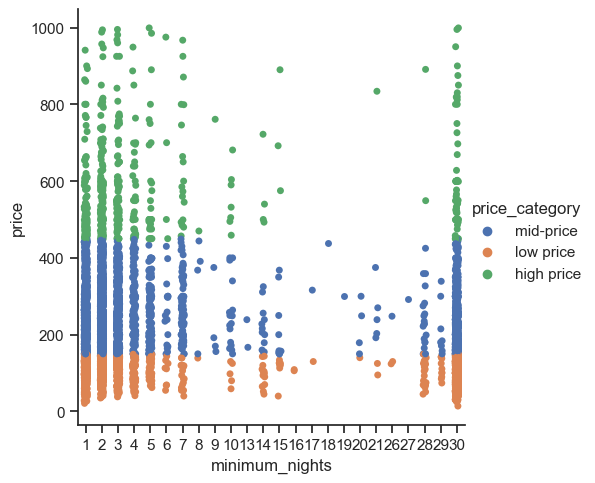

In [63]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_4 = sns.catplot(x = 'minimum_nights', y = 'price', hue = 'price_category', data = df_analysis)

In [64]:
#Export viz
cat_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_price.png'))

## Task Step 7 - Key Questions

#### Is there a relationship between the number of reviews in the last 12 months and the availability? Can this be used to determine which units are unavailable due to books versus host black outs?

Based on the above charts, I don't believe there is a linear relationship between these two variables.


#### Does the number of listings a host has affect their reviews?

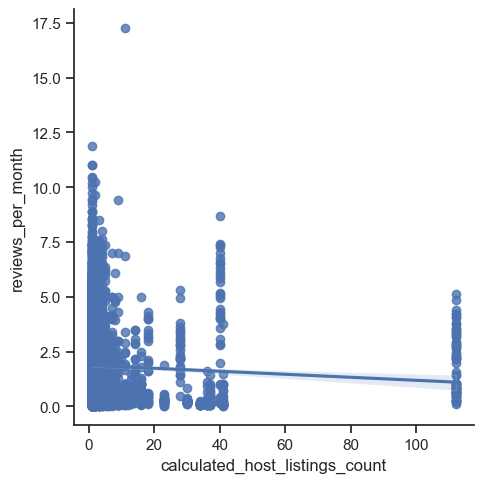

In [65]:
# Create Categorical Plot
scatter_3 = sns.lmplot(x = 'calculated_host_listings_count', y = 'reviews_per_month', data = df_plot)

There is not a strong relationship between the number of listings a host has and the number of reviews per month.

#### Does the minimum number of nights required to book affect availability?

There is a weak positive correlation of 0.23 between the minimum number of nights required to book for vacation units and availability. Similar to the analysis between minimum number of nights required and number of reviews relationship, this relationship is probably more due to the fact that if a unit has a higher minimum requirement, it is subsequently available for less of the year, so this likely could not be a determinant of popularity.

## Task Step 8 - Hypotheses

At this stage, I'm not sure I've explored all the variables enough to determine a hypotheses to test - the objective of my analysis was to determine if variables such as neighborhood, room type, and minimum night stays have an impact on availability, price and reviews. From the correlation investigation, it seems that minimum night stay requirements have a fairly weak impact on availability (0.23 correlation) or price (-0.23 correlation), and the impact on number of reviews, as discussed above, is likely more of an indication of how many renters are able to stay in a unit each month. I may be able to compare all listings that have a 1-2 night minimum to have a sense of their "popularity" using number of reviews, but this likely introduces sample bias into the analysis. As the availability is weakly positively correlated (ie as the minimum night requirement goes up, so does the availability of the unit, meaning units with higher minimum night requirements may be less popular/be available for more of the year), I could potentially test:

"If a unit has a high minimum night requirement of 3 or more weeks, then the availability of the unit will be higher than units with minimum night requirements of less than 3 weeks."

### Export Data

In [66]:
#Exporting subset of vacation rentals/under $1,000 per night listings
df_analysis.to_csv(os.path.join(path, '02 Data','Prepared Data', 'vacation_listings_subset.csv'))

In [67]:
#Exporting df_listings (non-subset, with category flags applied)
df_listings.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_flags.csv'))

In [68]:
#Creating subset to generate correlation matrix heatmap in tableau
df_tableau = df_analysis[['listing_id','price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

In [69]:
#Exporting subset
df_tableau.to_csv(os.path.join(path, '02 Data','Prepared Data', 'tableau_matrix.csv'))